In [1]:
from IPython.display import HTML
HTML('<style>{}</style>'.format(open('../css/cowi.css').read()))

# 4. Plotting

## Plotting with `matplotlib`
There are many plotting libraries in the Python ecosystem, and more being added all the time. The most widely known is called `matplotlib`, which is the one we are going to focus on.

`matplotlib` is a third party library, which means that it is developed and maintained by the Python Community and not the core developers of the Python language itself. This means that it doesn't ship with the Python installation and has to be installed separately before we can import it and use it in our programs. `matplotlib` is one of the oldest, most known and well documented third party libraries in Python.

---

If `matplotlib` is not yet installed you can install it in a way that suits your setup. 

> If you are using the **Standard Python** installation, go to the Windows cmd and type `pip install matplotlib`

> If you are using an **Anaconda Python** distribution go to Anaconda Prompt and type `conda install matplotlib`

---

*The lines in the code cell below are just some setup code for showing plots inside this notebook environment. These are not relevant in an editor.*

In [1]:
# Enable for plots to be shown inside Jupyter Notebook cells 
# (Note: This line is not needed when using an editor)   
%matplotlib inline  

# The lines below sets the figure size throughout the notebook
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = 7, 5

## Importing `matplotlib` to the script

The `matplotlib` library needs to be imported in a script in order to access its functions and methods:

In [2]:
# Import the plotting library and refer to it as plt later on
import matplotlib.pyplot as plt

It is customary to import `as plt` so referencing can be done as 

~~~python
plt.do_something()                # plt replaces matplotlib.pyplot
~~~
Where `do_something()` is some function/method inside `matplotlib`. This is much shorter than typing
~~~python
matplotlib.pyplot.do_something()  # Long and cumbersome to type
~~~

In fact, the `plt` part could be named differently, but **it is widely accepted to use this naming**, which makes it easier to read other people's code.

## Simple plotting API
The simple API for plotting in `matplotlib` uses commands which deliberately were chosen very similar to the `Matlab` syntax. 

API stand for *Application Programming Interface*. It is basically a simplified way of interacting with more complex underlying code. Here, we will type fairly simple plotting commands, which do a lot of low level work in the background.

Below we define some $x$- and $y$-coordinates to be plotted:   

In [ ]:
# Create x- and y-coordinates for f(x) = x^2 
x = [i for i in range(-100, 105, 5)]
y = [i**2 for i in x]

Once the coordinates are there, creating a simple line plot is easy:

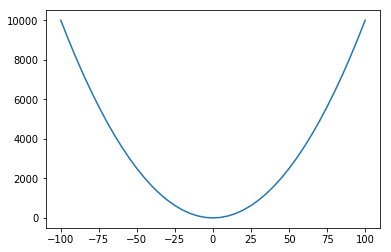

In [3]:
# Create basic plot
plt.plot(x, y)

# Show plot
plt.show()

Given a list of data for `x` and `y`, a line graph can be produced in a single command `plt.plot(x,y)`, while actually showing the plot has its own command. 

It might seem wierd that the `plt.show()` is needed, but it is not always desired to have the plot shown. Sometimes it is desired to produce the graph and have it saved to a png-file or do something else with it instead of showing it. 
For more complex plots there might be many different plotting commands to build the plot, but only a single showing command is needed at the end. 

### Customization of graphs
The plot of $f(x)=x^2$ from above can be made much nicer by a little customization. The command names should make the code self-explanatory.

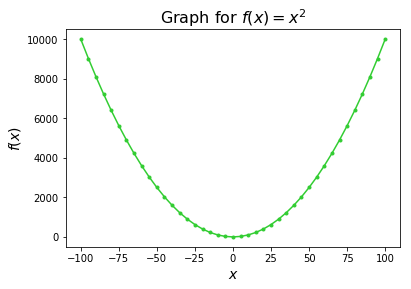

In [4]:
plt.title('Graph for $f(x) = x^2$', fontsize=16)
plt.xlabel('$x$', fontsize=14)
plt.ylabel('$f(x)$', fontsize=14)
plt.plot(x, y, '.-', color='limegreen', markersize=6)
plt.show()

### Plotting multiple graphs in the same plot
It is possible to plot many graphs in the same plot. It can also be styled with a grid and a legend:

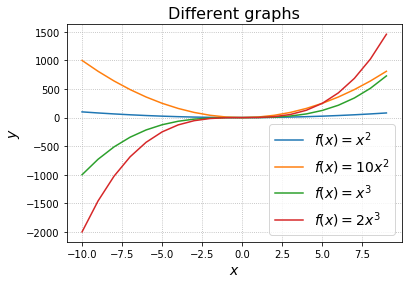

In [5]:
# Create x-coordinates for graphs 
x = [i for i in range(-10, 10, 1)]

# Produce y-values for different graphs
y1 = [i**2 for i in x]     # f(x) = x^2
y2 = [10*i**2 for i in x]  # f(x) = 10x^2
y3 = [i**3 for i in x]     # f(x) = x^3
y4 = [2*i**3 for i in x]   # f(x) = 2x^3

# Create plots with legend labels for each graph
plt.plot(x, y1, label='$f(x)=x^2$')
plt.plot(x, y2, label='$f(x)=10x^2$')
plt.plot(x, y3, label='$f(x)=x^3$')
plt.plot(x, y4, label='$f(x)=2x^3$')

# Set titles, grid and legend
plt.title('Different graphs', fontsize=16)
plt.xlabel('$x$', fontsize=14)
plt.ylabel('$y$', fontsize=14)
plt.grid(linestyle=':')
plt.legend(fontsize=14)
plt.show()

> * Graphs are automatically colorized, but this can of course be customized.
> * Legend will by default try to position itself so it does not overlap with the graphs, but it can be forced into a certain position if need be.  

### Fill between
Plot areas can be filled based on conditions. 

The code in the next cell serves only to create dummy data for an example graph. 

In [6]:
# The code in this cell is just for creating a dummy graph
import numpy as np
x1 = np.linspace(1, 10, 100)
x2 = np.linspace(10, 15, 100)
x3 = np.linspace(15, 20, 100)
y1 = 2 * np.sin(1.98*x1)
y2 = 3 * np.sin(-x2)
y3 = 1 * np.sin(2.2 * x3)
y = np.append(np.append(y1, y2), y3)
x = np.append(np.append(x1, x2), x3)

Plotting this dummy graph and filling areas between the graph and $y=0$ with green color:

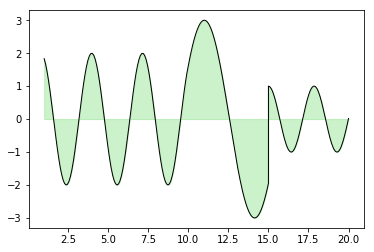

In [7]:
# Plot line graph in black
plt.plot(x, y, color='black', linewidth=1)

# Put green/purple fill between the graph y=0
plt.fill_between(x, y, color='limegreen',  alpha=.25)

plt.show()

We can make differentiated colors by given a conditional statement in the keyword argument `where`:

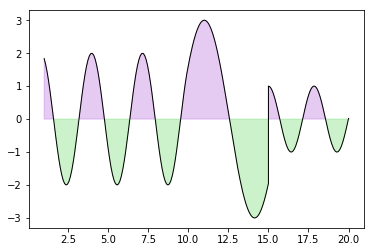

In [8]:
# Plot line graph in black
plt.plot(x, y, color='black', linewidth=1)

# Put green/purple fill between the graph y=0
plt.fill_between(x, y, where= y <= 0, color='limegreen',  alpha=.25)
plt.fill_between(x, y, where= y > 0, color='darkorchid',  alpha=.25)

plt.show()

 > **Note:** The sequences to be plotted has to be `numpy` arrays in order to make element wise comparison like `where= y > 0`. Trying this with standard Python lists will throw a `TypeError: '<' not supported between instances of 'list' and 'int'`. This is one of the many benefits of `numpy`. See a little more info about `numpy` later in this text.

### Subplots
Creating subplots is also straight forward:

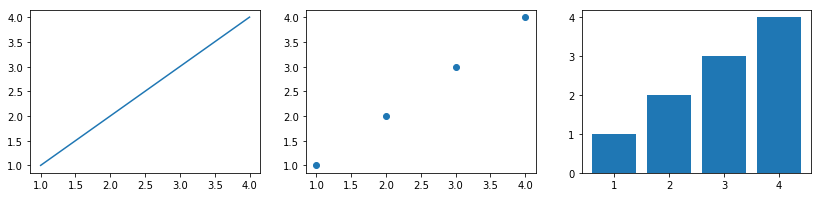

In [9]:
# Create a figure for holding subplots and set size
plt.figure(figsize=(14,3))

# Create first plot as line plot
plt.subplot(131)
plt.plot([1, 2, 3, 4], [1, 2, 3, 4])

# Create second plot as scatter plot
plt.subplot(132)
plt.plot([1, 2, 3, 4], [1, 2, 3, 4], '.', markersize=12)

# Create third plot as bar plot
plt.subplot(133)
plt.bar([1, 2, 3, 4], [1, 2, 3, 4])
plt.show()

> * The `subplot` argument conatins three digits, where the first one is the number of rows, the second the number of columns and the third the current plot to manipulate. 
> * For making more complicated grid formations, shared axis tick marks etc. The **Object Oriented API** should be used instead.

## Object Oriented API
Almost every aspect of a visualization can be controlled. However, in order to access more complex controls, the way of interaction with the graph elements also becomes a little more complex. 

In order to use the more powerful `matplotlib` API, we get into so-called *Object Oriented Programming*. We access each element of a figure as an *object* and manipulate that object.

The figure below gives an overview of the objects that can be controlled in a figure to enable very high customizability of plots.

![title](matplotlib_objects_anatomy_of_a_figure.png)

Source: [Anatomy of a figure](https://matplotlib.org/3.1.1/gallery/showcase/anatomy.html).

### Subplots

* Note especially that the `Axes` object is the actual content of the plot, and therefore does not refer to `x`- or `y`-axis themselves.

The Object Oriented API is recommended for more complex plotting like creation of larger grids of subplots where each plot needs independent adjustments. 

In the example below we still run the `plt.` command, but we save it to two variables `fig` and `ax`: 

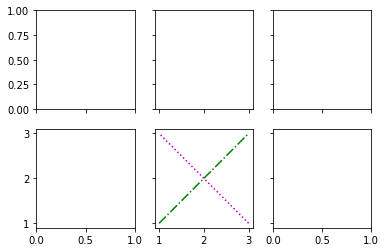

In [10]:
# Create a 2 by 3 subplot grid with shared x- and y-axis
fig, ax = plt.subplots(2, 3, sharex='col', sharey='row')

# Put content on the plot at grid spot 1,1 (0 indexed)
ax[1, 1].plot([1, 2, 3], [1 ,2, 3], 'g-.')
ax[1, 1].plot([3, 2, 1], [1, 2, 3], 'm:')

plt.show()

> * The figure that is created is saved in the variable `fig` 
> * The axes for all the subplots are saved in an array variable `ax`
> * Individual subplots can be manipulated by indexing into the `ax` variable. Indexing starts from `0`, so `ax[1,1]` is the middle plot in the bottom row as seen above.
> * There are many other plot types where the *Object Orientated API* is preferred compared to the simple Matlab style one.

## Online help and plotting galleries
Instead of creating a figure from scrath, it can be quicker to serch the web for the graph style of choice, fetch a piece of code and modify it. 

Here are some useful links:

* Plotting gallery for `matplotlib` with code examples: https://matplotlib.org/gallery/index.html


* Some more examples with `matplotlib`: https://www.machinelearningplus.com/plots/top-50-matplotlib-visualizations-the-master-plots-python/


* Predefined styles `matplotlib`: https://matplotlib.org/gallery/style_sheets/style_sheets_reference.html


* Predefined color names for `matplotlib`: https://matplotlib.org/gallery/color/named_colors.html. Colors can also be defined as hexidecimal or RGB.


## Numerical computation library: `numpy`
Another very well known and broadly used third party library is `numpy` (short for Numerical Python), which contains many useful features for fast and efficient numerical calculations. This library has a lot of the same functionality as `Matlab` and utilizes vectorization to perform calculations.

It can be installed in the same way as every other third party library, namely by entering `pip install numpy` or `conda install numpy` from the relevant Prompt.

Once installed `numpy` can be used as shown below. Like with the `matplotlib` import, `numpy`also has a community accepted standard of importing as `np`:

In [12]:
import numpy as np

The basic data structure in `numpy` is called an array, which can be compared to a normal Python list.

A numpy array can be created, for example from a list, like this:

In [13]:
# A normal Python list
L = [1, 2, 3, 4, 5]   

# List converted to numpy array
arr = np.array(L)     

Printing the array looks like a normal list:

In [13]:
print(arr)  

[1 2 3 4 5]


But it is in fact a `numpy` array, which can be seen by inspecting the type:

In [14]:
print(type(arr))

<class 'numpy.ndarray'>


The fact that `numpy` uses verctorization can be seen for example by performing mulitplication:

In [14]:
# Multiply all array elements by 2 and print result
arr_double = 2 * arr

print(arr_double)

[ 2  4  6  8 10]


Recall that doing the same operation with a normal Python list is a little more complicated. Here shown with a list comprehension, but a normal `for` loop could also be used. 

In [15]:
# Multiply all list elements by 2 and print result
L_double = [2*i for i in L]

print(L_double)

[2, 4, 6, 8, 10]


### Function: `np.linspace()`

As mentioned, `numpy` has many useful functions and methods. One of the most used functions is 

~~~python
numpy.linspace(start, stop, num=50) 
~~~

which will generate an array of `num` numbers evenly spaced between `start` and `end`. As we day from Session 3 about functions, the `num=50` means that `num` is an optional argument, the default value of which is 50. So, if `num` is not specified, the generated array will have 50 evenly spaced numbers between `start`and `end`.

**Note** that the `numpy.linspace()` function has more arguments, which are not shown here. See the documention for more info: https://docs.scipy.org/doc/numpy/reference/generated/numpy.linspace.html

An example:

In [17]:
np.linspace(0, 1, 10)

array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
       0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ])

The `numpy.linspace()` function can especially be useful when generating $x$-values for plotting purposes.

### Benefits of `numpy`
* In general `numpy` operations are **much** faster than equivalent operations in standard Python. When handling large amounts of data or computationally intensive tasks, `numpy` should be therefore preferred. 


* Many useful functions and methods for working with data are predefined and optimized in the library. Before starting to reinvent the wheel for array manipulations, check if a `numpy` solution exists. `np.linspace()` is just one example of this.


* A lot of other libraries are built on top of or uses `numpy`. In fact `matplotlib` uses it for its plotting operations.


* Using `numpy`'s predefined functions and methods often lead to more readable than using other ways. Consider e.g. the example from above with element-wise multiplication. The Matlab-style syntax is just more reable for numeric computation.


# Exercise 1.1
All exercises use the simple API described above.

Plot a black line graph with dots at the points with these coordinates:

~~~python
x = [1, 3, 6, 9, 16]
y = [7, 3, 7, 1, 5]
~~~

Remember to `import matplotlib.pyplot as plt` and to call `plt.show()`. 

The color can be set by `plt.plot(..., color='black')` or by a shortcut `plt.plot(..., 'k')`, where `'k'` is black becuase `'b'` is blue. 

# Exercise 1.2
Set the plot title on the graph from Exercise 1.1. You choose what the title should be.

# Exercise 1.3
Set the title of the $x$- and $y$-axis on the graph from Exercise 1.1. You choose what the title should be.

# Exercise 1.4
Add the graphs with the following $y$-values to the plot from Exercise 1.1. Use the same $x$-values for all curves.

~~~python
y2 = [9, 5, 5, 2, 6]
y3 = [4, 6, 2, 6, 8]
y4 = [1, 8, 1, 3, 2]
~~~

# Exercise 1.5
Go back through the code from the previous exercises and add a `label` to the plots that were produced. Choose a label text freely.
Afterwards, add a legend to the plot. 

# Exercise 1.6 
Save the figure to a png-file. This can be done by the command `plt.savefig(desired_filename.png)`. This will save it in the same folder as you have your script.


*If you are dissatisfied with the size of the saved figure, this can be adjusted by explicitly creating the figure object before any of the graphs are created. Creating the figure object and setting a size is done by `plt.figure(figsize=(width, height))`. Both `width` and `height` are in inches. Try with different values.*


*Note: When using the simple API it is not necessary to explicitly create the figure object before starting the plotting with `plt.plot()`, as the figure is automatically created in the background with default settings. When saving to a file where it is not possible to drag the plot after creation, it is often useful to set the figure size beforehand*

# Exercise 2.1
Create a new figure by the command `plt.figure()`. This will create a new figure object that subsequent commands will tie to. This is to avoid having the commands in this exercise be plotted in the plot from the previous exercises. 


Redo the graphs from the previous exercises, this time split into four subplots instead. You choose how to structure the grid and how to style the graphs with colors, titles, line types etc.


# Exercise 2.2
Create a new figure and replicate the same subplots as in Exercise 2.1. But this time, turn the plots into bar plots. The only difference is that the plotting call should now be `plt.bar(...)`.


# Exercise 3.1
Create plot that is filled with some color of your choice between $y=0$ and the curve defined by $xx$ and $yy$ below:

~~~python 
import numpy as np
xx = np.linspace(-100, 100, 100)
yy = xx**2-3027                   # <- Element-wise multiplication and subtraction (numpy)
~~~


# Exercise 4.1
Use `numpy.linspace()` to create an array with 10 values from 1-10. Save the array in a a variable called `x_arr`.

Use the code below to create the $y$-values for five graphs. 

~~~python 
y_arr1 = np.random.rand(10)
y_arr2 = np.random.rand(10)
y_arr3 = np.random.rand(10)
y_arr4 = np.random.rand(10)
y_arr5 = np.random.rand(10)
~~~


*The `numpy.random.rand()` function creates random values between 0 and 1 (see documentation for more: https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.rand.html)*


Create a loop that goes through the five graphs. Each loop should create a figure with your chosen size and settings for the current graph and save it to a png-file.
You should end up with five png-files each containing only a single graph/curve.

# If you are up for more 
Take the polygon plotting function `plot_polygon()` from the exercise solutions from Session 3. Create different polygons, run them through a for loop and save them to png-files. Remember that `plot_polygon()` calls the other functions `polygon_area()` and `polygon_centroid`, which also have to be copied.